In [2]:
from scipy.optimize import curve_fit, root
import matplotlib.pyplot as plt
import numpy as np

<h2>A hack to make our implicit equation to explicit form</h2>

In [4]:
def getI(V, *params):
    """
    This function will generate cuurent for given voltage given 5 diode parameters    
    """
    kb = 1.38*10**(-23) #Boltzmann constant
        
    Temp = 25
    kb = 1.38*10**(-23) #Boltzmann constant
    q = 1.6*10**(-19)
    Vt = kb*(Temp+273)/q
    Ncell = 72
    
    
    Rs, Rsh, Isat, Iph, eta = params
    
    I_implicit_equn = lambda i: -i + Iph - Isat*(np.exp((v+i*Rs) / (eta*Ncell*Vt))-1) - (v+i*Rs)/Rsh
    I=[]
    
    '''Now we will find the root if the implicit equation to get the value of i'''
    
    for v in V:
        i_solution = root(I_implicit_equn,10)
        i = i_solution.x[0]
        I.append(i)
    return (np.array(I))

<h2>Testing the getI function </h2>

In [5]:
diode_param = (0.3551735739069161, 20051.491203008736, 2.9778179325966427e-10, 9.250163845946686, 1.0266558791833786)
print(getI([40], *diode_param))

[7.54880733]


<h2>Now generating data that is going to be fitted in the next step</h2>

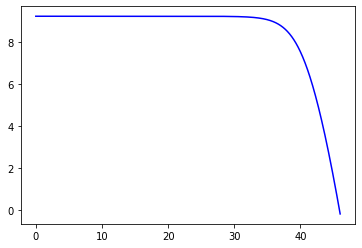

In [6]:
datasize=1000
# xdata is V vector from 0 to 46V of size 100
xdata=np.linspace(0,46,datasize)
#Using getI function to calculate I as ydata
ydata = getI(xdata, *diode_param)
plt.plot(xdata, ydata, 'b-', label='data')

In [7]:
noise = np.random.normal(0,0.05,datasize)

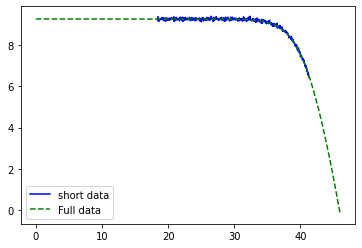

In [8]:
initial_guess=(0.5, 500, 1e-10, 9, 1) # A very generic initial guess
short_x = xdata[400:900]
short_y = ydata[400:900]+noise[400:900]
plt.plot(short_x, short_y, 'b-', label='short data')
plt.plot(xdata, ydata, 'g--', label='Full data')
plt.legend()

<h2>Now fitting our shortened data to getI function</h2>

In [ ]:
popt, pcov = curve_fit(getI, short_x, short_y, initial_guess)
print (popt) # parameters

<h2>Plotting the shortend data as well as predicted one</h2>

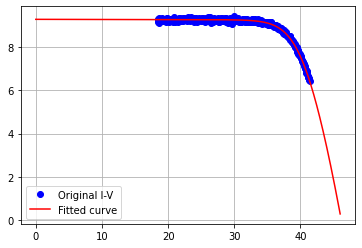

In [37]:
plt.plot(short_x, short_y, 'bo', label='Original I-V') #Original plot
plt.plot(xdata, getI(xdata, *popt), 'r-', label='Fitted curve')
plt.legend()
plt.grid()